# Capstone : IT Ticket Classification [SEPT SUN GRP 4B]

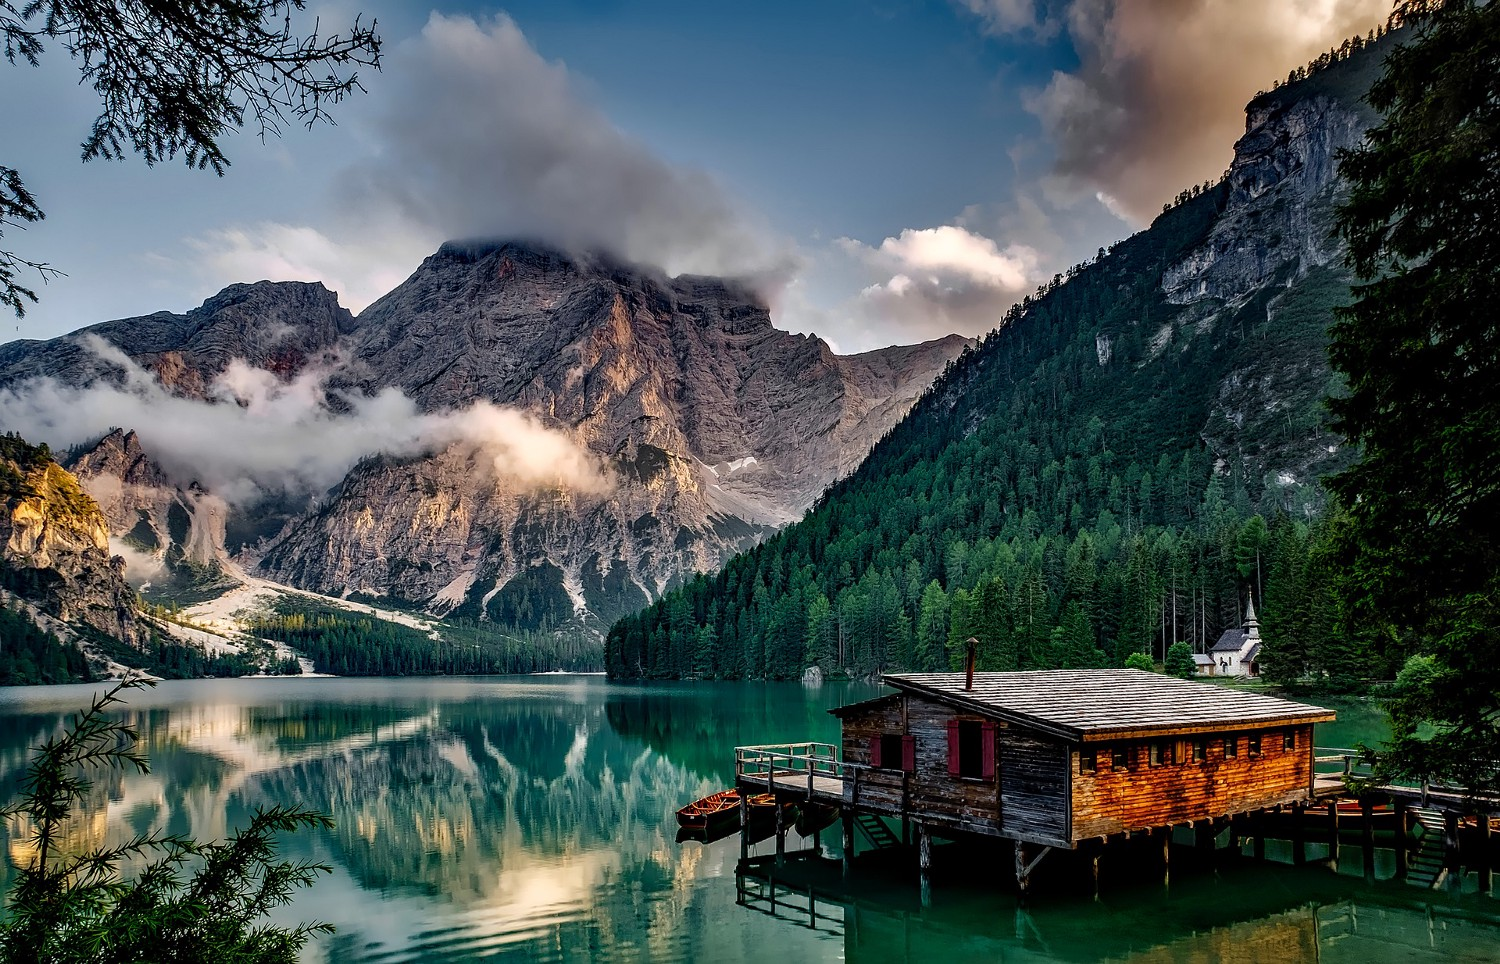

# Aim: Automatic Ticket Assignment [Part 3/6] - Data Resampling

## Part 3/6

This part deals with data resampling as the targer class is highly imbalanced as analyzed in Part 1/6.



Build a classifier that can classify the tickets by analyzing text. Classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import re 
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time

import warnings
import pandas.testing as tm
import spacy  
#import langid 
import nltk

import re, string
from wordcloud import WordCloud
from pprint import pprint

from sklearn.utils import resample
from sklearn import preprocessing

from nltk.corpus import stopwords
from nltk.classify.textcat import TextCat  
from dateutil import parser
from nltk.tokenize import word_tokenize
#from langdetect import detect
from textblob import TextBlob
#from googletrans import Translator

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim 

from sklearn.decomposition import LatentDirichletAllocation

from string import punctuation

#import enchant
#from enchant.checker import SpellChecker
    
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from scipy import spatial
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB

import logging, warnings
from PIL import Image

##--------------------##

if sys.version_info >= (3, 3) :
    import collections.abc as collections_abc
else:
    import collections as collections_abc
    
from collections import Counter
from collections import OrderedDict
import operator

##-------------------##

plt.style.use('ggplot')
%matplotlib inline

#warnings.filterwarnings("ignore",category=DeprecationWarning)
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [2]:
np.__version__ , pd.__version__,tf.__version__, print(sys.version_info)

sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)


('1.16.1', '1.0.1', '2.0.0', None)

In [3]:
"""
Download required NLTK stopwords corpus if it has not already been downloaded.
Download required NLTK corpora if they have not already been downloaded.
Download the NLTK averaged perceptron tagger that is required for this algorithm to run only if the corpora has not already been downloaded.
Download Punkt Sentence Tokenizer. This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences
"""
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True) 

True

# Data Loading

In [4]:
"""
from google.colab import drive
drive.mount('/content/drive')

project_path = '/content/drive/My Drive/Colab Notebooks/'
file_name ='input_data.xlsx'

"""
project_path = 'C:/MyDrive/Drive2/PersonalDrive/MachineLearning/GreatLearning/CapstoneProject/Final-Deck/'
file_name ='itsupportdatacleaned_2.csv'

In [5]:
data=pd.read_csv(project_path+file_name,encoding=sys.getfilesystemencoding()) 
data.head(2).T

0  \
Short description                                            login issue   
Description            login issue login issue verify user detail emp...   
Caller                                                 spxjnwir pjlcoqds   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                              GRP_0   
Text_length                                                          204   
Dominant_Topic                                                         0   
Topic_Perc_Contrib                                                0.9874   
Keywords               issue, unable, tool, user, error, work, access...   
Text                   ['issue', 'verify', 'user', 'detail', 'employe...   

                                                                       1  
Short description                                                outlook  
Description            outlook outlook hello team meeting skype meeti...  
Caller                                                 hmjdrvpb komuaywn  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                              GRP_0  
Text_length                                                          142  
Dominant_Topic                                                         0  
Topic_Perc_Contrib                                                0.9814  
Keywords               issue, unable, tool, user, error, work, access...  
Text                   ['meet', 'meet', 'appear', 'outlook', 'calenda...

In [6]:
cols = [0,1,2,3,4,5,6,7] #cols = [1,2,3,4,5,6]
data = pd.read_csv(project_path+file_name, usecols=cols)
data.head(2).T

FileNotFoundError: [Errno 2] File C:/MyDrive/Drive2/PersonalDrive/MachineLearning/GreatLearning/CapstoneProject/Final-Deck/itsupportdatacleaned_2.csv does not exist: 'C:/MyDrive/Drive2/PersonalDrive/MachineLearning/GreatLearning/CapstoneProject/Final-Deck/itsupportdatacleaned_2.csv'

In [7]:
data.shape #data.info() , #data[data.columns[0]]

(7805, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Short description      7805 non-null   object 
 1   Description            7801 non-null   object 
 2   Caller                 7805 non-null   object 
 3   Assignment group       7805 non-null   object 
 4   New_Assignment_Groups  7805 non-null   object 
 5   Text_length            7805 non-null   int64  
 6   Dominant_Topic         7805 non-null   float64
 7   Topic_Perc_Contrib     7805 non-null   float64
 8   Keywords               7805 non-null   object 
 9   Text                   7805 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 609.9+ KB


In [9]:
data.describe()

Text_length  Dominant_Topic  Topic_Perc_Contrib
count  7805.000000     7805.000000         7805.000000
mean    191.610122        0.535939            0.858941
std     327.887363        0.753190            0.160085
min       2.000000        0.000000            0.360200
25%      69.000000        0.000000            0.742900
50%     111.000000        0.000000            0.953800
75%     203.000000        1.000000            0.979600
max    6256.000000        2.000000            0.999300

# Dataset Generation

In [10]:
data.tail(2).T

7803  \
Short description                         machine nÃ£o estÃ¡ funcionando   
Description            machine est funcionando machine est funcionand...   
Caller                                                 ufawcgob aowhxjky   
Assignment group                                                  GRP_62   
New_Assignment_Groups                                             GRP_62   
Text_length                                                          123   
Dominant_Topic                                                         0   
Topic_Perc_Contrib                                                0.9863   
Keywords               issue, unable, tool, user, error, work, access...   
Text                   ['machine', 'machine', 'unable', 'access', 'ma...   

                                                                    7804  
Short description      an mehreren pc`s lassen sich verschiedene prgr...  
Description            mehreren pc lassen sich verschiedene prgramdnt...  
Caller                                                 kqvbrspl jyzoklfx  
Assignment group                                                  GRP_49  
New_Assignment_Groups                                             GRP_49  
Text_length                                                          141  
Dominant_Topic                                                         2  
Topic_Perc_Contrib                                                0.9069  
Keywords               job, fail, scheduler, site, circuit, backup, c...  
Text                    ['prgramdntyme', 'prgramdntyme', 'prgramdntyme']

In [11]:
data.shape,len(data[data.columns[4]].value_counts().sort_values(ascending=False)), len(data[data.columns[3]].value_counts().sort_values(ascending=False)), 

((7839, 8), 74, 74)

Important:

- The target class is imbalanced. We have many classes with less than 10 incidents. We have avoided the temptation to group such scantly populated classes in order to balance the input dataset. Instead we planned to use the resampling and SMOTE and class weights to address the target class imbalance. Our earlier plan was to build three different dataset. First to have GRP_0 and rest of the records classified into one and use two step classification model and the second one to have non-GRP_0 groups resampled for the second order classification and third dataset in which we keep all the groups (74) as it is and address the imbalance issue. 
- After due considerations and discussions, we finally decided to pursue only the third dataset so that we don’t tend to force fit the data into model. 

The label data provided in the target class is imbalanced and skewed. Most of the tickets (3976, almost 50%) are being assigned to a single group (GRP_0). There are also assignment groups which have been assigned only a single ticket in the given dataset. We have earlier planned to merge these smaller groups into a single group to reduce the imbalance. This could have solved the imbalance problem. However, we are avoiding add-on group creations as we want the models to predict on the feature data as it is  because these assignment groups are dynamic data and would keep changing. Hence using group names as a basis of reclassification will only serve a temporary purpose and even otherwise, it will lead to overfitting of the data. Hence we have kept the data as it is and addressed the imbalance through methods like SMOTE and RESAMPLING. In some cases the number of incident records are less than six in a target class and hence SMOTE can not be applied as it is. We need a suitable combination of sampling methods to prepare the dataset which is balanced and right one to be fed to the models.


# Dataset (Resampled)

In [11]:
data.shape

(7805, 10)

In [12]:
data_3_resampled = data[0:0]
data_3_resampled.shape

(0, 10)

In [13]:
data_3_resampled.head().T

Empty DataFrame
Columns: []
Index: [Short description, Description, Caller, Assignment group, New_Assignment_Groups, Text_length, Dominant_Topic, Topic_Perc_Contrib, Keywords, Text]

In [14]:
print(data.columns[4])
len(data[data.columns[4]].unique())

New_Assignment_Groups


74

In [15]:
min_t_cnt= 'GRP_0'
mask_1= data[data.columns[4]] != min_t_cnt #mask_1 for less than or same as min text length
mask_2= data[data.columns[4]] == min_t_cnt #mask_2 for above min text length
data.shape[0],len(data[mask_1]), len(data[mask_2])

(7805, 4395, 3410)

In [16]:
data_3_max = data[mask_1][data[mask_1].columns[4]].value_counts().max()
data_3_max

645

In [17]:
for i in data[data.columns[4]].unique():
    data_3_resampled = data_3_resampled.append(resample(data[data[data.columns[4]] == i], 
                                                        replace=True, 
                                                        n_samples=int(data_3_max),
                                                        random_state=1
                                                       )
                                              )

In [18]:
data_3_resampled.shape, len(data_3_resampled[data_3_resampled.columns[4]].unique())

((47730, 10), 74)

In [19]:
order = data_3_resampled[data_3_resampled.columns[4]].value_counts().sort_values(ascending=False).index
order, len(order)

(Index(['GRP_35', 'GRP_66', 'GRP_54', 'GRP_62', 'GRP_5', 'GRP_33', 'GRP_58',
        'GRP_56', 'GRP_36', 'GRP_3', 'GRP_45', 'GRP_12', 'GRP_16', 'GRP_60',
        'GRP_2', 'GRP_53', 'GRP_27', 'GRP_70', 'GRP_11', 'GRP_25', 'GRP_59',
        'GRP_9', 'GRP_19', 'GRP_72', 'GRP_49', 'GRP_14', 'GRP_43', 'GRP_8',
        'GRP_51', 'GRP_13', 'GRP_42', 'GRP_57', 'GRP_40', 'GRP_69', 'GRP_46',
        'GRP_64', 'GRP_50', 'GRP_55', 'GRP_65', 'GRP_1', 'GRP_71', 'GRP_31',
        'GRP_6', 'GRP_63', 'GRP_67', 'GRP_47', 'GRP_29', 'GRP_15', 'GRP_4',
        'GRP_20', 'GRP_21', 'GRP_30', 'GRP_7', 'GRP_28', 'GRP_18', 'GRP_0',
        'GRP_61', 'GRP_48', 'GRP_68', 'GRP_17', 'GRP_24', 'GRP_26', 'GRP_32',
        'GRP_41', 'GRP_22', 'GRP_37', 'GRP_73', 'GRP_38', 'GRP_23', 'GRP_52',
        'GRP_34', 'GRP_44', 'GRP_10', 'GRP_39'],
       dtype='object'),
 74)

In [20]:
plt.subplots(figsize=(20,3))
ax=sns.countplot(x=data_3_resampled.columns[4], data=data_3_resampled, color='royalblue' , order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

# Label Encoding

In [21]:
def labelencoder(dataframe) : 
    label_encoder = preprocessing.LabelEncoder() 
    dataframe = label_encoder.fit_transform(dataframe)
    encodedlabels = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
    return dataframe, encodedlabels

In [22]:
data_3_resampled.columns[4], data_3_resampled.shape 

('New_Assignment_Groups', (47730, 10))

There are 477730 records afer resampling.

In [23]:
data_3_resampled[data_3_resampled.columns[4]], data_3_resampled_labels = labelencoder(data_3_resampled[data_3_resampled.columns[4]])

In [24]:
data_3_resampled.head(2).T

2305  \
Short description             collaboration_platform site is not opening   
Description            collaboration platform site open collaboration...   
Caller                                                 anpocezt qturbxsg   
Assignment group                                                   GRP_0   
New_Assignment_Groups                                                  0   
Text_length                                                           85   
Dominant_Topic                                                         0   
Topic_Perc_Contrib                                                0.5195   
Keywords               issue, unable, tool, user, error, work, access...   
Text                   ['site', 'open', 'site', 'open', 'site', 'open...   

                                                                    407   
Short description                                        account locked.  
Description                       account lock account lock account lock  
Caller                                                 bkyphsgq cfyksehu  
Assignment group                                                   GRP_0  
New_Assignment_Groups                                                  0  
Text_length                                                           29  
Dominant_Topic                                                         0  
Topic_Perc_Contrib                                                0.9538  
Keywords               issue, unable, tool, user, error, work, access...  
Text                                         ['lock', 'account', 'lock']

In [26]:
data_3_resampled.to_csv(project_path+"itsupportdatacleaned_3.csv", index=False)

### Summary:


The label data provided in the target class is imbalanced and skewed. Most of the tickets (3976, almost 50%) are being assigned to a single group (GRP_0). There are also assignment groups which have been assigned only a single ticket in the given dataset. We are earlier planned to merge these smaller groups into a single group to reduce the imbalance. This could have solved the imbalance problem. However, we are avoiding add-on group creations as we want the models to predict on the feature data as it is  because these assignment groups are dynamic data and would keep changing. Hence using group names as a basis of reclassification will only serve a temporary purpose and even otherwise, it will lead to overfitting of the data. Hence we have kept the data as it is and addressed the imbalance through methods like SMOTE and RESAMPLING. In some cases the number of incident records are less than six in a target class and hence SMOTE can not be applied as it is. We need a suitable combination of sampling methods to prepare the dataset which is balanced and right one to be fed to the models.


The data has been resampled. The resampled data will be given to Machine Learning and Deep learning models in Part 4/6.